In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [5]:
df = pd.read_csv("spam.csv", encoding="latin1")


In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
df = df.iloc[:, :2]
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [9]:
df.head

<bound method NDFrame.head of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [10]:
df.describe

<bound method NDFrame.describe of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [12]:
df['length'] = df['message'].apply(len)

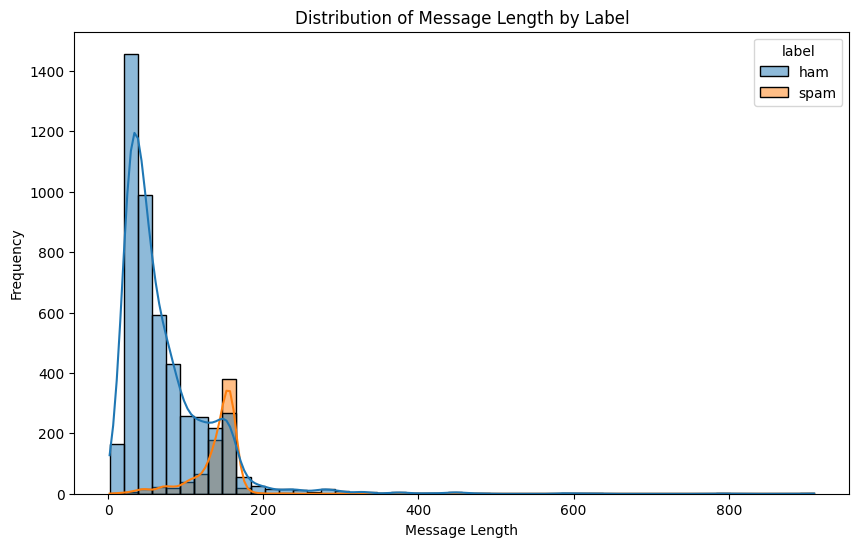

In [13]:
# Visualize message length
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length', hue='label', bins=50, kde=True)
plt.title('Distribution of Message Length by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


In [14]:
spam_messages = ' '.join(df[df['label'] == 'spam']['message'])
ham_messages = ' '.join(df[df['label'] == 'ham']['message'])

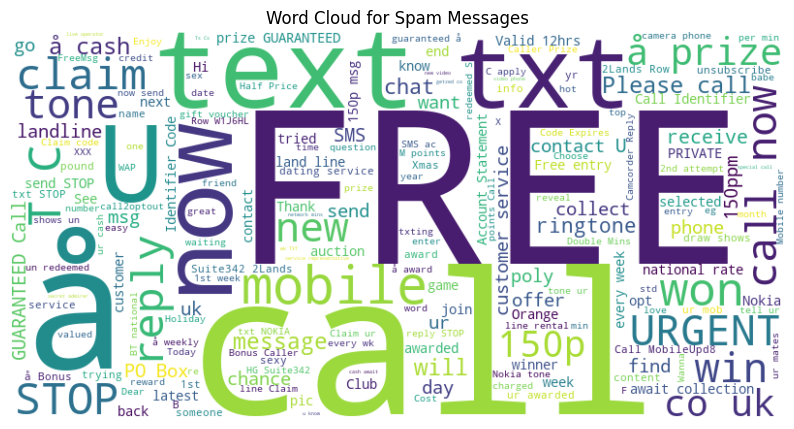

In [15]:
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

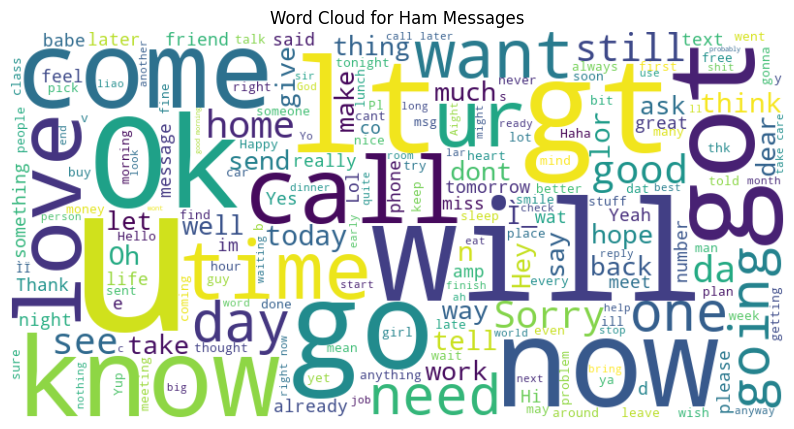

In [16]:
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_bow)


In [20]:
spam_detect_model = MultinomialNB()
spam_detect_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [21]:
X_test_bow = bow_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_bow)

y_pred = spam_detect_model.predict(X_test_tfidf)


In [22]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



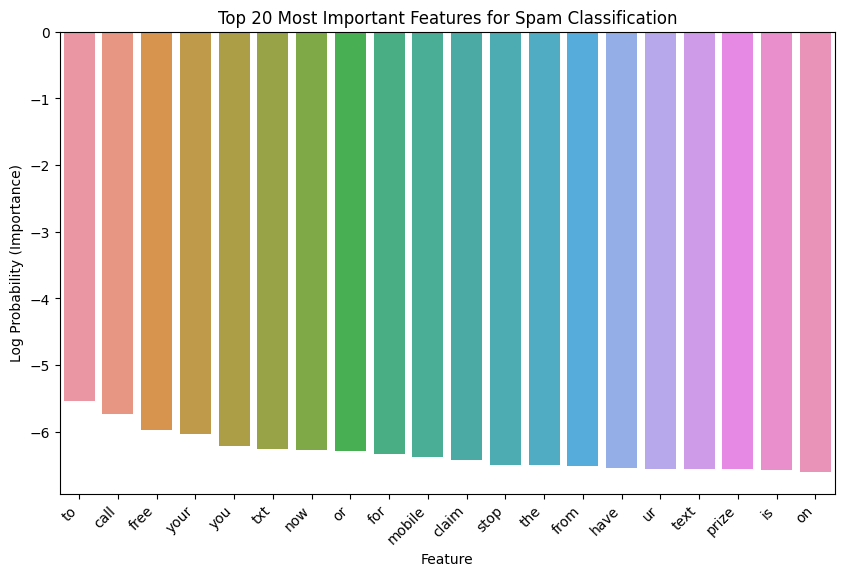

In [29]:
# Visualize most important features for classification
top_features_indices = spam_detect_model.feature_log_prob_[1, :].argsort()[-20:][::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=np.array(bow_vectorizer.get_feature_names_out())[top_features_indices],
            y=spam_detect_model.feature_log_prob_[1, top_features_indices])
plt.title('Top 20 Most Important Features for Spam Classification')
plt.xlabel('Feature')
plt.ylabel('Log Probability (Importance)')
plt.xticks(rotation=45, ha='right')
plt.show()